In [26]:
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# load the data 
data = pd.read_csv('../data/divorces_2000-2015_translated.csv')
data

,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,...,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody
0,9/6/06,Necesario,MEXICANA,18/12/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN
1,1/2/00,Voluntario,MEXICANA,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN
2,1/2/05,Necesario,MEXICANA,22/2/55,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN
3,1/2/06,Necesario,MEXICANA,20/1/64,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE
4,1/2/06,Necesario,MEXICANA,30/10/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,31/10/12,Voluntario,MEXICANA,29/10/77,MORELIA,MORELIA,MICHOACAN,MEXICO,35.0,MORELIA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,3.0,11.0,NaN,NaN
4919,31/10/13,Voluntario,MEXICANA,10/11/82,VERACRUZ,VERACRUZ,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,1.0,NaN,NaN,NaN
4920,31/10/13,Voluntario,MEXICANA,28/10/54,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,59.0,EMILIANO ZAPATA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,35.0,NaN,2.0,NaN
4921,31/12/12,Voluntario,MEXICANA,7/2/58,TLAPACOYAN,TLAPACOYAN,VERACRUZ,MEXICO,54.0,XALAPA,...,TLAPACOYAN,VERACRUZ,PREPARATORIA,NaN,PRIMARIA,NO TRABAJA,33.0,NaN,2.0,NaN


In [3]:
# keep the DOB info from the divorce data and dropping rows with missing DOB.
dob_data =data[['DOB_partner_man','DOB_partner_woman']].dropna()
dob_data

,DOB_partner_man,DOB_partner_woman
0,18/12/75,8/1/83
2,22/2/55,21/3/47
4,30/10/75,13/10/78
5,28/3/73,14/6/76
6,13/12/70,4/11/71
...,...,...
4918,29/10/77,12/1/78
4919,10/11/82,9/2/81
4920,28/10/54,17/2/57
4921,7/2/58,27/1/64


In [4]:
# Prep the DOB column for split
dob_data_clean = dob_data.apply(pd.to_datetime)

# Split the data by month and date to prep for zodic sign sortting. 
dob_data_clean['day_man'], dob_data_clean['month_man'] = dob_data_clean['DOB_partner_man'].apply(lambda x: x.day), dob_data_clean['DOB_partner_man'].apply(lambda x: x.month)
dob_data_clean['day_woman'], dob_data_clean['month_woman'] = dob_data_clean['DOB_partner_woman'].apply(lambda x: x.day), dob_data_clean['DOB_partner_woman'].apply(lambda x: x.month)

# Drop the DOB colums and only keep day and month data
dob_data_day_month = dob_data_clean.drop(['DOB_partner_man', 'DOB_partner_woman'], axis=1)
dob_data_day_month

,day_man,month_man,day_woman,month_woman
0,18,12,1,8
2,22,2,21,3
4,30,10,13,10
5,28,3,14,6
6,13,12,11,4
...,...,...,...,...
4918,29,10,1,12
4919,11,10,2,9
4920,28,10,17,2
4921,2,7,27,1


In [5]:
# function for the zodiac sign determination
def zodiac_sign(day, month): 
    
    if month == 12: 
        return 'Sagittarius' if (day < 22) else 'Capricorn'

    elif month == 1: 
        return 'Capricorn' if (day < 20) else 'Aquarius'

    elif month == 2: 
        return 'Aquarius' if (day < 19) else 'Pisces'

    elif month == 3: 
        return 'Pisces' if (day < 21) else 'Aries'

    elif month == 4: 
        return 'Aries' if (day < 20) else 'Taurus'

    elif month == 5: 
        return 'Taurus' if (day < 21) else 'Gemini'

    elif month == 6: 
        return 'Gemini' if (day < 21) else 'Cancer'

    elif month == 7: 
        return 'Cancer' if (day < 23) else 'Leo'

    elif month == 8: 
        return 'Leo' if (day < 23) else 'Virgo'

    elif month == 9: 
        return 'Virgo' if (day < 23) else 'Libra'

    elif month == 10: 
        return 'Libra' if (day < 23) else 'Scorpio'

    elif month == 11: 
        return 'Scorpio' if (day < 22) else 'Sagittarius'

In [6]:
# Creating two additioanl column for 
dob_data_day_month['Zod_sign_man'] = dob_data_day_month.apply(lambda x: zodiac_sign(x['day_man'], x['month_man']), axis=1)
dob_data_day_month['Zod_sign_woman'] = dob_data_day_month.apply(lambda x: zodiac_sign(x['day_woman'], x['month_woman']), axis=1)
dob_data_day_month

,day_man,month_man,day_woman,month_woman,Zod_sign_man,Zod_sign_woman
0,18,12,1,8,Sagittarius,Leo
2,22,2,21,3,Pisces,Aries
4,30,10,13,10,Scorpio,Libra
5,28,3,14,6,Aries,Gemini
6,13,12,11,4,Sagittarius,Aries
...,...,...,...,...,...,...
4918,29,10,1,12,Scorpio,Sagittarius
4919,11,10,2,9,Libra,Virgo
4920,28,10,17,2,Scorpio,Aquarius
4921,2,7,27,1,Cancer,Aquarius


In [7]:
zod_sign_db = dob_data_day_month.drop(['day_man','month_man','day_woman','month_woman'],axis=1)
zod_sign_db

,Zod_sign_man,Zod_sign_woman
0,Sagittarius,Leo
2,Pisces,Aries
4,Scorpio,Libra
5,Aries,Gemini
6,Sagittarius,Aries
...,...,...
4918,Scorpio,Sagittarius
4919,Libra,Virgo
4920,Scorpio,Aquarius
4921,Cancer,Aquarius


In [8]:
# Creating a matrix for the zodiac signs combinations 
adjacency_matrix = pd.crosstab(zod_sign_db.Zod_sign_man, zod_sign_db.Zod_sign_woman)
idx = adjacency_matrix.columns.union(adjacency_matrix.index)
adjacency_matrix = adjacency_matrix.reindex(index = idx, columns=idx, fill_value=0)
adjacency_matrix.head(12)

,Aquarius,Aries,Cancer,Capricorn,Gemini,Leo,Libra,Pisces,Sagittarius,Scorpio,Taurus,Virgo
Aquarius,35,34,28,26,32,32,23,24,26,34,32,29
Aries,35,23,25,27,29,35,32,24,28,24,30,27
Cancer,40,33,35,21,21,31,36,43,32,35,24,36
Capricorn,26,33,29,28,31,31,13,39,33,27,25,25
Gemini,29,29,22,28,30,40,36,25,22,32,30,34
Leo,24,25,28,20,35,28,31,28,29,27,40,34
Libra,29,29,29,21,29,25,35,32,26,30,37,35
Pisces,25,40,28,33,25,25,35,33,33,32,33,27
Sagittarius,35,37,33,26,26,25,35,24,36,27,32,34
Scorpio,33,35,23,31,24,27,38,33,28,33,36,32


In [9]:
# Creating an additional col for the zodiac combinations
zod_sign_db['zod_combo'] = zod_sign_db['Zod_sign_man'] + zod_sign_db['Zod_sign_woman']
zod_sign_db

,Zod_sign_man,Zod_sign_woman,zod_combo
0,Sagittarius,Leo,SagittariusLeo
2,Pisces,Aries,PiscesAries
4,Scorpio,Libra,ScorpioLibra
5,Aries,Gemini,AriesGemini
6,Sagittarius,Aries,SagittariusAries
...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius
4919,Libra,Virgo,LibraVirgo
4920,Scorpio,Aquarius,ScorpioAquarius
4921,Cancer,Aquarius,CancerAquarius


/Users/xuandi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

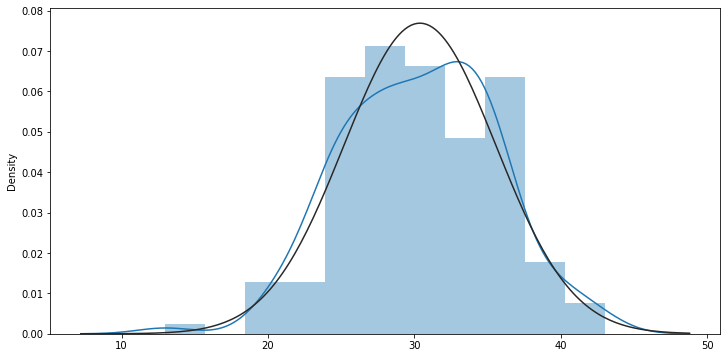

In [10]:
#see the histogram for the normal distribution
plt.figure(figsize=(12,6))
sns.distplot(zod_sign_db['zod_combo'].value_counts(), fit=norm);
plt.xlabel("")

In [11]:
# load the compatability data 
comp_matrix  = pd.read_csv('../data/Comp_matrix.csv')
comp_matrix

,Zodiac_combination,Compatibility_rate
0,CancerPisces,0.98
1,TaurusGemini,0.33
2,VirgoPisces,0.88
3,PiscesAries,0.67
4,CancerAquarius,0.27
...,...,...
139,CancerCapricorn,0.83
140,LibraCapricorn,0.55
141,LeoCapricorn,0.35
142,VirgoCapricorn,0.95


/Users/xuandi/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '')

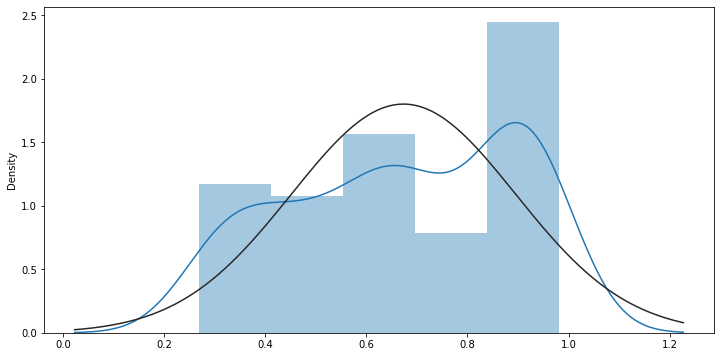

In [12]:
#see the histogram for the normal distribution
plt.figure(figsize=(12,6))
sns.distplot(comp_matrix['Compatibility_rate'], fit=norm);
plt.xlabel("")

In [13]:
comp_matrix.describe()

,Compatibility_rate
count,144.000000
mean,0.673472
std,0.222363
min,0.270000
25%,0.480000
50%,0.680000
75%,0.880000
max,0.980000



The zodiac compatibility matrix simply shows how good the zodiac signs fit each other in the range of 1 to 100% from the astrology point of view. Now we need to determine the "bad" and "good" fits, but where is the borderline for that? Given it is 1-100%, should we simply put 50%?

From the histogram, we see that the compatibilities aren't well-distributed from 1 to 100% and they are quite positively skewed into the second 50%. Well, this is what astrology says and we have to deal with that. As seen from the describe() function - the minimum compatibility is 27% - obviously the bad fit, and the maximum compatibility of 98% is definitely a good one.  Also, the standard deviation is 0.22 and the mean is 0.67, so 0.5 (50%) isn't really a good idea here as we have many more zodiac sign combinations in the 50-100% range.

Probably the good idea is to ask Pandas pd.qcut() function to help us. It will divide the range into equal-sized buckets based on sample quantiles (medians). In the below example I divide the range into 2 categories with one median, but this awesome function gives an option to split any dataset/range into many chunks using quantiles and multiple medians.

From: https://www.kaggle.com/code/aagghh/python-vs-astrology-testing-zodiac-predictions

In [14]:
# Use pd.qcut() function to divide the range into equal-sized buckets based on sample quantiles (medians).
#setting the categories
compatibility_fit_labels = ['Bad_fit', 'Good_fit']

#creating a new col for the categories
comp_matrix['Compatibility'] = pd.qcut(comp_matrix['Compatibility_rate'], q= [0, .5, 1], labels=compatibility_fit_labels)

In [15]:
#seeing how many values in each category
comp_matrix['Compatibility'].value_counts()

Bad_fit     73
Good_fit    71
Name: Compatibility, dtype: int64

In [16]:
# Rename the col for dataframe join
comp_matrix = comp_matrix.rename(columns={'Zodiac_combination': 'zod_combo'})

#joining the datframes
cols = ['zod_combo']
divorce_data = zod_sign_db.join(comp_matrix.set_index(cols), on=cols)

divorce_data

,Zod_sign_man,Zod_sign_woman,zod_combo,Compatibility_rate,Compatibility
0,Sagittarius,Leo,SagittariusLeo,0.93,Good_fit
2,Pisces,Aries,PiscesAries,0.67,Bad_fit
4,Scorpio,Libra,ScorpioLibra,0.35,Bad_fit
5,Aries,Gemini,AriesGemini,0.83,Good_fit
6,Sagittarius,Aries,SagittariusAries,0.93,Good_fit
...,...,...,...,...,...
4918,Scorpio,Sagittarius,ScorpioSagittarius,0.28,Bad_fit
4919,Libra,Virgo,LibraVirgo,0.68,Bad_fit
4920,Scorpio,Aquarius,ScorpioAquarius,0.73,Good_fit
4921,Cancer,Aquarius,CancerAquarius,0.27,Bad_fit


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [27]:
# do one-hot encoding to Zod_sign_man and Zod_sign_woman and combine them together into a dataframe as X
X_men = pd.get_dummies(zod_sign_db['Zod_sign_man']).values
X_women = pd.get_dummies(zod_sign_db['Zod_sign_woman']).values
X = pd.DataFrame(X_men + X_women)

# define y variable 
y = divorce_data.Compatibility

# Rename the columns to zodiac sign
adjacency_matrix = pd.crosstab(zod_sign_db.Zod_sign_man, zod_sign_db.Zod_sign_woman)
idx = adjacency_matrix.columns.union(adjacency_matrix.index)
X.columns = idx

# Rearranging index to start from 1
X.index = np.arange(1, len(X) + 1)

# avoid the multi-line formatting
pd.set_option('expand_frame_repr', False)

print(X)



      Aquarius  Aries  Cancer  Capricorn  Gemini  Leo  Libra  Pisces  Sagittarius  Scorpio  Taurus  Virgo
1            0      0       0          0       0    1      0       0            1        0       0      0
2            0      1       0          0       0    0      0       1            0        0       0      0
3            0      0       0          0       0    0      1       0            0        1       0      0
4            0      1       0          0       1    0      0       0            0        0       0      0
5            0      1       0          0       0    0      0       0            1        0       0      0
...        ...    ...     ...        ...     ...  ...    ...     ...          ...      ...     ...    ...
4370         0      0       0          0       0    0      0       0            1        1       0      0
4371         0      0       0          0       0    0      1       0            0        0       0      1
4372         1      0       0          0      

In [25]:
print(y)

0       Good_fit
2        Bad_fit
4        Bad_fit
5       Good_fit
6       Good_fit
          ...   
4918     Bad_fit
4919     Bad_fit
4920    Good_fit
4921     Bad_fit
4922     Bad_fit
Name: Compatibility, Length: 4374, dtype: category
Categories (2, object): [Bad_fit < Good_fit]


In [19]:
# test train split #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.9862888482632541


In [20]:
# this is cross_val_score #
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.98514286 0.98285714 0.97942857 0.98057143 0.9771167 ]


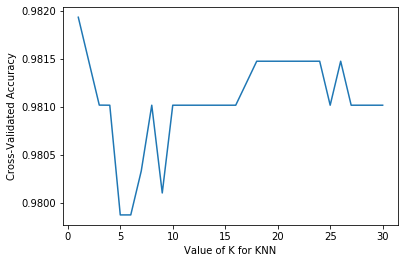

In [21]:
# Use cross_val_score to choose model and configs #
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [24]:
# test the model
knn.fit(X_train, y_train)
y_predict = knn.predict([[0,0,0,2,0,0,0,0,0,0,0,0]])
y_predict 

array(['Good_fit'], dtype=object)